In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Se

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [4]:
#constants
healthy='/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (100).jpg'
cancers='/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg'
image_path='/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set'

In [5]:
healthy_brain=Image.open(healthy)
cancer_infected_brain=Image.open(cancers)

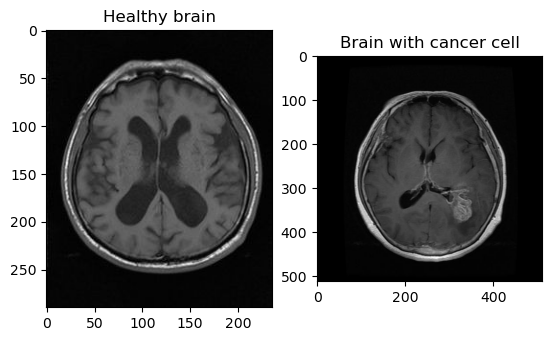

In [6]:
plt.subplot(1,2,1)
plt.title("Healthy brain")
plt.imshow(healthy_brain)
plt.subplot(1,2,2)
plt.imshow(cancer_infected_brain)
plt.title("Brain with cancer cell");

In [7]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.1,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.2)

In [8]:
train=train_dg.flow_from_directory(image_path,
                               class_mode="categorical",
                                   batch_size=32,
                                   target_size=(84,84),subset='training')
dev=train_dg.flow_from_directory(image_path,
                               class_mode="categorical",
                                   batch_size=32,
                                   target_size=(84,84),subset='validation')

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [9]:
cnn=Sequential()
cnn.add(Conv2D(filters=33,kernel_size=3,activation="relu"))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Conv2D(filters=33,kernel_size=3,activation="relu"))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Conv2D(filters=33,kernel_size=3,activation="relu"))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Flatten())
#Ann
l2=L2(l2=0.03)
cnn.add(BatchNormalization())
cnn.add(Dense(400,'relu',name="nn_layer",kernel_regularizer=l2))
cnn.add(Dense(600,'relu',name="nn_layer_1",kernel_regularizer=l2))
cnn.add(Dense(350,'relu',name="nn_layer_2",kernel_regularizer=l2))
cnn.add(Dense(200,'relu',name="nn_layer_3",kernel_regularizer=l2))
cnn.add(Dropout(0.2))
cnn.add(Dense(150,'relu',name="nn_layer_4"))
cnn.add(Dense(80,'relu',name="nn_layer_5"))
cnn.add(Dense(2,'softmax',name="output_layer"))
#compile
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
n_epoch=26
with tensorflow.device('/GPU:0'):
    hisotry=cnn.fit(train,epochs=n_epoch,validation_data=dev)

Epoch 1/26
116/116 [==============================] - 60s 469ms/step - loss: 10.9830 - accuracy: 0.7023 - val_loss: 0.9181 - val_accuracy: 0.7802
Epoch 2/26
116/116 [==============================] - 22s 192ms/step - loss: 0.6612 - accuracy: 0.7827 - val_loss: 0.7727 - val_accuracy: 0.6594
Epoch 3/26
116/116 [==============================] - 23s 196ms/step - loss: 0.6058 - accuracy: 0.8106 - val_loss: 0.6704 - val_accuracy: 0.8390
Epoch 4/26
116/116 [==============================] - 23s 194ms/step - loss: 0.5618 - accuracy: 0.8397 - val_loss: 0.5792 - val_accuracy: 0.8041
Epoch 5/26
116/116 [==============================] - 22s 188ms/step - loss: 0.5209 - accuracy: 0.8566 - val_loss: 0.7808 - val_accuracy: 0.7682
Epoch 6/26
116/116 [==============================] - 23s 197ms/step - loss: 0.4765 - accuracy: 0.8726 - val_loss: 1.2867 - val_accuracy: 0.5756
Epoch 7/26
116/116 [==============================] - 23s 195ms/step - loss: 0.4467 - accuracy: 0.8816 - val_loss: 0.5831 - val_a

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 33)    924       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 33)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 33)    9834      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 33)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 33)    9834      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 33)   0

In [12]:
for i in hisotry.history:
    print(i)

loss
accuracy
val_loss
val_accuracy


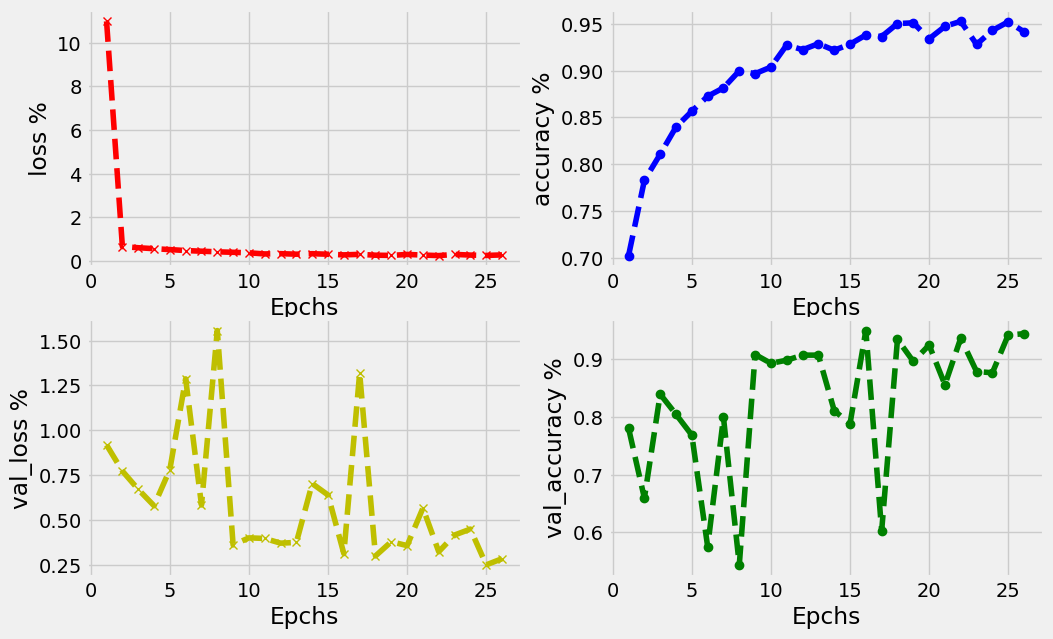

In [13]:
plt.style.use('fivethirtyeight')
color={'loss':'x--r','accuracy':"o--b",
      'val_loss':'x--y','val_accuracy':'o--g'}
plt.figure(figsize=[11,7])
for idx,ax in enumerate(hisotry.history):
    plt.subplot(2,2,idx+1)
    plt.plot(np.arange(1,27),hisotry.history[ax],color[ax])
    plt.xlabel("Epchs")
    plt.ylabel(ax+" %")